# Explore some recomendation strategies for follower recomendation


Some Ideas:
- Most Followed, followee of followees?
    - Triad completion?
- A Page Rank Type Thing?
    - https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#pagerank
    - A problem is that we would only recommend locally popular people?
    
- Community Detection
    - https://networkx.org/documentation/stable/reference/algorithms/community.html
    

Can we mix two to get second degree, so we balance popular and less popular people?


I think we are trying to do like an edge prediction task?
- 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import pickle

In [3]:
# pandas options
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

## Use the karate club dataset!

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


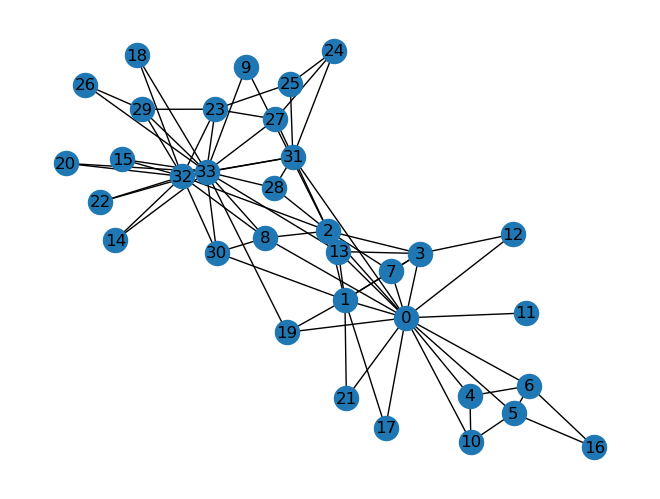

In [4]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_spring(G, with_labels=True, )
plt.show()

In [5]:
positive_test = [(30, 1), (5 ,16), (15, 18)]

negative_test = [(20, 21), (19, 28), (11, 10)]

In [6]:
communities = list(nx.community.girvan_newman(G))

In [7]:
communities[0]

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [9]:
pr = nx.pagerank(G, alpha=0.9)


## Read in hci.social network

In [29]:
with open("followers_dict.pkl", "rb") as file: 
    followers_dict = pd.read_pickle(file)
    
with open("following_dict.pkl", "rb") as file: 
    following_dict = pd.read_pickle(file)   

In [30]:
df_profiles = pd.read_csv("data/profiles/hci_social_profiles_local.csv")

In [31]:
df_profiles.head()

,id,acct,url,created_at,followers_count,following_count,statuses_count,last_status_at,instance
0,108286624813793740,cqz,https://hci.social/@cqz,2022-05-12T00:00:00.000Z,48,20,24,2023-11-03,https://hci.social/
1,108286142941695868,Gillian,https://hci.social/@Gillian,2022-05-12T00:00:00.000Z,368,271,36,2022-12-23,https://hci.social/
2,108286014897638184,AndreaHCI,https://hci.social/@AndreaHCI,2022-05-11T00:00:00.000Z,13,9,1,2022-12-26,https://hci.social/
3,108285815791532398,izd,https://hci.social/@izd,2022-05-11T00:00:00.000Z,39,22,37,2023-10-12,https://hci.social/
4,108285424167487793,shirinfeiz,https://hci.social/@shirinfeiz,2022-05-11T00:00:00.000Z,12,20,0,NaN,https://hci.social/


In [32]:
G_hci = nx.DiGraph()

# these will be labeled by the index
G_hci.add_nodes_from(df_profiles["acct"].values)

In [33]:
# loop over the df
for index, user in list(df_profiles.iterrows()):
    this_node = user["acct"]
    
    if this_node not in G_hci:
        G_hci.add_node(this_node)
    
    # add the following edges
    
    for user_following in following_dict[this_node]:
        
        following_node = user_following["acct"]
        
        
        if "@" in following_node:
            # only get the local instance
            # i.e. keep only hci.social
            continue
        
        if following_node not in G_hci.nodes:
            G_hci.add_node(following_node)
            
        candidate_edge = (this_node, following_node)
        
        if candidate_edge not in G_hci.edges:
            G_hci.add_edge(*candidate_edge)
    

In [42]:
sparse_adj_matrix = nx.adjacency_matrix(G_hci)

In [43]:
sparse_adj_matrix

<1487x1487 sparse array of type '<class 'numpy.int64'>'
	with 21320 stored elements in Compressed Sparse Row format>

In [47]:
with open("adj_matrix.pkl", "wb") as file: 
    pickle.dump(sparse_adj_matrix, file, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
hci_pr = nx.pagerank(G_hci, alpha=0.9)

In [53]:
max(hci_pr, key=hci_pr.get)

'andresmh'

In [54]:
hci_pr["andresmh"]

0.013522250750862653

In [55]:
hci_pr["MattNicholson"]

0.0005683741379419413

In [58]:
hci_pr["joshua_paup"]

0.0006766576647250593

In [59]:
hci_pr["Anas"]

0.0005282015441707725

In [62]:
hci_pr["bkeegan"]

0.006438770609679004

In [40]:
len(G_hci.nodes)

1487

In [38]:
len(followers_dict.keys())

1528

In [39]:
len(following_dict.keys())

1528